In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from scipy import stats

# Data

In [2]:
data = pd.read_csv("train.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
data = data.drop(["PassengerId","Name", 
                  "Fare", 
                  "SibSp", "Parch", 
                  "Ticket", "Fare", 
                  "Cabin", "Embarked"], axis=1)
data.head(6)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
5,0,3,male,NaN


## Hipotesis test for average

Hipotesis teste for data average to replace null values.

In [4]:
# Count null values data age:
print(data['Age'].isnull().sum())

177


We have 177 null values on the column `Age`.

Replace `NaN` values to zero:

In [5]:
data['Age'] = data['Age'].fillna(0)
data.head(7) 

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
5,0,3,male,0.0
6,0,1,male,54.0


In [6]:
# 95% confience

conf = 0.05 

<Axes: >

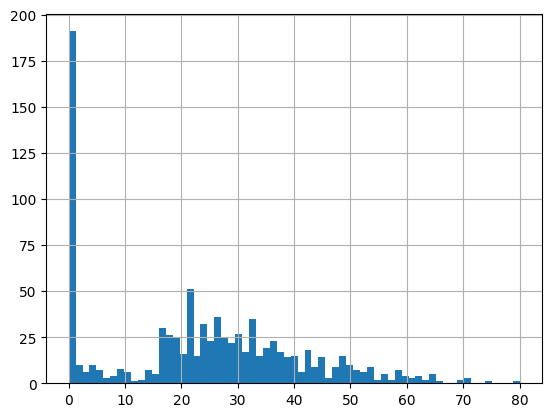

In [7]:
# Histogran

data.Age.hist(bins = 65)

In [8]:
# Test normal

normaltest(data.Age)

NormaltestResult(statistic=30.304727683607705, pvalue=2.6267092031270737e-07)

In [9]:
# Get data

stat_test, p_value = normaltest(data.Age)
print(stat_test)
print(p_value)

30.304727683607705
2.6267092031270737e-07


*Normal test is False!*

Apparently we have a right-skewed distribution.

Now that we formally know that this is a right-skewed distribution, let's use the median as an intermediate value to substitute in the rows where we have missing values.

In [11]:
# Data Age median
print(f"Data median is equal: {np.nanmedian(data['Age'])}")

Data median is equal: 24.0


In [4]:
# Data alter
data['Age'] = data['Age'].fillna(24)
data.head(7) 

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
5,0,3,male,24.0
6,0,1,male,54.0


# Description Variable Age

### Distribuition of Frequency Data Age

In [13]:
# To calculate number of class:

def sturges(dataframe):
    
    k = 1 + (10/3) * np.log10(np.size(dataframe))
    k = int(k.round(0))

    return k

# Number classes:

print(sturges(data['Age']))

11


In [14]:
# To calculate frenquency and medium point classes e definity classes.

def distribuition(number_class, dataframe):


    """

    Return classes and medium point classes and frequency classes. 
    

    """
    
    # Size class
    size_class = round((np.max(data['Age']) - np.min(data['Age'])) / number_class, 2)

    # min and max Class:
    lim_i = dataframe.min()
    lim_s = 0

    # Count number Classes:
    cout_class = 0

    # Cumulative frequency
    f_cumulative = 0
    
    
    while cout_class < number_class:

        cout_class+=1

        lim_s = round((lim_i + size_class) - 1, 3)

        
        # Count frequency:
        frequency = 0
        for value in np.nditer(dataframe):
            if value >= lim_i and value <= lim_s:
                frequency+=1

        # Cumulative frequency
        f_cumulative+=frequency
        
        print(f'Class({cout_class}) {lim_i}-{lim_s} Point: {round((lim_i + lim_s) / 2, 1)} frquency: {frequency} frequency-cml: {f_cumulative}')


        lim_i = lim_s + 1


    return "\n Classes Confirmed Successfully!"



# Calculate Distribuition:

print(distribuition(11, data['Age']))

Class(1) 0.0-6.27 Point: 3.1 frquency: 224 frequency-cml: 224
Class(2) 7.27-13.54 Point: 10.4 frquency: 21 frequency-cml: 245
Class(3) 14.54-20.81 Point: 17.7 frquency: 102 frequency-cml: 347
Class(4) 21.81-28.08 Point: 24.9 frquency: 158 frequency-cml: 505
Class(5) 29.08-35.35 Point: 32.2 frquency: 113 frequency-cml: 618
Class(6) 36.35-42.62 Point: 39.5 frquency: 66 frequency-cml: 684
Class(7) 43.62-49.89 Point: 46.8 frquency: 50 frequency-cml: 734
Class(8) 50.89-57.16 Point: 54.0 frquency: 31 frequency-cml: 765
Class(9) 58.16-64.43 Point: 61.3 frquency: 17 frequency-cml: 782
Class(10) 65.43-71.7 Point: 68.6 frquency: 6 frequency-cml: 788
Class(11) 72.7-78.97 Point: 75.8 frquency: 1 frequency-cml: 789

 Classes Confirmed Successfully!


### Histogram Relative Frequency for column data Age

[Text(0, 0, '0.053'),
 Text(0, 0, '0.024'),
 Text(0, 0, '0.141'),
 Text(0, 0, '0.346'),
 Text(0, 0, '0.127'),
 Text(0, 0, '0.073'),
 Text(0, 0, '0.067'),
 Text(0, 0, '0.027'),
 Text(0, 0, '0.019'),
 Text(0, 0, '0.007'),
 Text(0, 0, '0.001')]

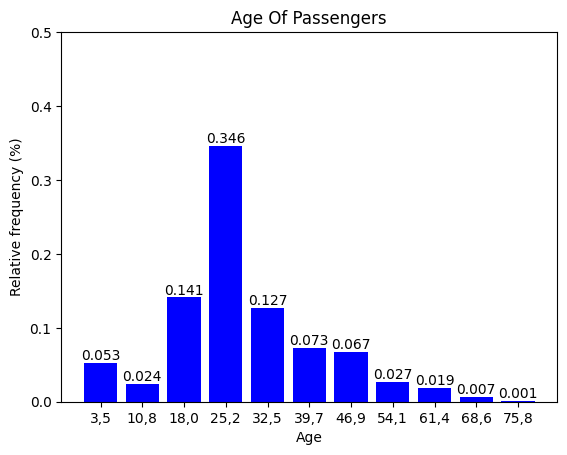

In [111]:

size_data = np.size(data['Age'])

frequencia_relativa = lambda i: round((i / size_data), 3)


# x
i = ['3,5', '10,8', '18,0', 
     '25,2', '32,5', '39,7', 
     '46,9', '54,1', '61,4', 
     '68,6', '75,8']

# y:
frequencia = [47, 21, 126, 
              308, 113, 65,
              60, 24, 17, 
              6, 1]



j = [frequencia_relativa(i) for i in frequencia]
bar_colors = ['blue']


fig, ax = plt.subplots()
bar_container = ax.bar(i, j, color=bar_colors)
ax.set(ylabel='Relative frequency (%)', 
       title='Age Of Passengers', xlabel='Age', 
       ylim=(0, 0.5))

ax.bar_label(
    bar_container)

60% of the passengers has age range 18 and 33 years.

In [16]:
# Average Ages:

print(f"The Average Age is equal: {np.average(data['Age']).round(0)} years.")

The Average Age is equal: 24.0 years.


In [17]:
# Standart Desviation

print(f"The standart desviation is equal: {np.std(data['Age']).round(0)} years.")

The standart desviation is equal: 18.0 years.


In [18]:
# Variance

print(f"Variance: {np.var(data['Age']).round(0)} years.")

Variance: 309.0 years.


In [19]:
# Covariance

print(f"The covariance is equal: {((np.std(data['Age']) / np.average(data['Age'])) * 100).round(0)}%.")

The covariance is equal: 74.0%.


## Histogram Cumulative Frequency

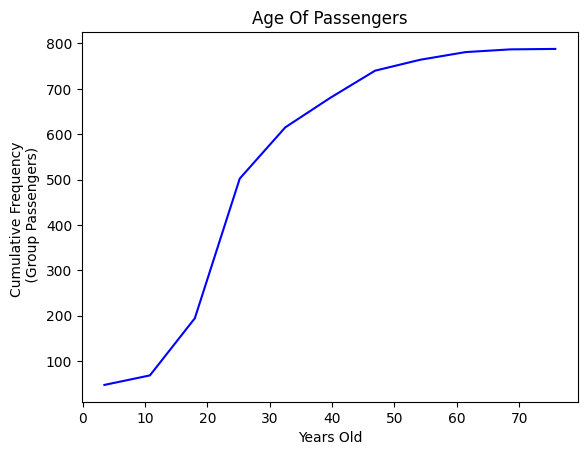

In [96]:
plt.plot([3.5, 10.8, 18.0, 
          25.2, 32.5, 39.7, 
          46.9, 54.1, 61.4, 
          68.6, 75.8],
         
         [47, 68, 194, 
          502, 615, 680, 
          740, 764, 781, 
          787, 788], 
         color='blue')

plt.ylabel('Cumulative Frequency \n (Group Passengers)')

plt.xlabel('Years Old')
plt.title('Age Of Passengers')

plt.show()

Of the 891 passengers, approximately 600 are aged less than or equal to 30 years, that is, corresponding to 67% of the total.

<br>

## Box-plot Column Age

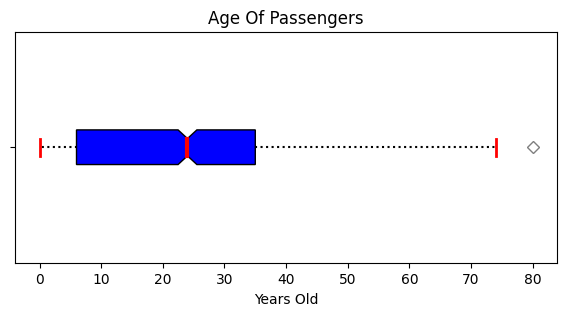

In [97]:
data_1 = data['Age']

data_list = [data_1]

fig = plt.figure(figsize =(7, 3))

ax = fig.add_subplot(111)


# 
bp = ax.boxplot(data_list, patch_artist = True,
notch ='True', vert = 0)


colors = ['blue']


for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

    
# 
for whisker in bp['whiskers']:
    whisker.set(color ='black',
                linewidth = 1.5,
                linestyle =":")    
# 
for cap in bp['caps']:
    cap.set(color ='red',
            linewidth = 2)    
# 
for median in bp['medians']:
    median.set(color ='red',
    linewidth = 3)
    
# 
for flier in bp['fliers']:
    flier.set(marker ='D',
            color ='#e7298a',
            alpha = 0.5)

# 
ax.set_yticklabels([''])

# 
plt.xlabel('Years Old')
plt.title('Age Of Passengers')

# 
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# 
plt.show()


In [22]:
# Quantile Q1

print(f"Quantile Q1: {np.quantile(data['Age'], 1/4)}")

Quantile Q1: 6.0


In [23]:
# Quantile Q2

print(f"Quantile Q2: {np.quantile(data['Age'], 1/2)}")

Quantile Q2: 24.0


In [24]:
# Quantile Q3

print(f"Quantile Q3: {np.quantile(data['Age'], 3/4)}")

Quantile Q3: 35.0


50 percent of passengers has years old bigger than or equal to 22 years and lass then 35 years.

<br>

# Age by Sex

### Sex: Male

In [25]:
# Data

age_sex_m = data.loc[(data['Age'] != 0) & (data['Sex'] == 'male')]

In [26]:
# Average

print(f"Average age for sex Male: {np.average(age_sex_m['Age']).round(0)}")

Average age for sex Male: 31.0


In [27]:
# Mode 

print(f"Mode age for sex Male: {age_sex_m['Age'].value_counts().head(5)}")

Mode age for sex Male: Age
19.0    18
25.0    18
28.0    18
21.0    17
22.0    15
Name: count, dtype: int64


In [28]:
# Median

print(f"Median age for sex Male: {np.median(age_sex_m['Age'])}")

Median age for sex Male: 29.0


### Sex: Female

In [29]:
age_sex_f = data.loc[(data['Age'] != 0) & (data['Sex'] == 'female')]

In [30]:
# Average

print(f"Average age for sex female: {np.average(age_sex_f['Age']).round(0)}")

Average age for sex female: 28.0


In [31]:
# Mode 

print(f"Mode age for sex female: {age_sex_f['Age'].value_counts().head(5)}")

Mode age for sex female: Age
24.0    16
18.0    13
22.0    12
30.0    11
35.0     8
Name: count, dtype: int64


In [32]:
# Median

print(f"Median age for sex female: {np.median(age_sex_f['Age'])}")

Median age for sex female: 27.0


<br>

# Age by Class

### Class 1

In [33]:
# Data
age_class_1 = data.loc[(data['Pclass'] == 1)]

In [34]:
# Average

print(f"Average age class 1: {np.average(age_class_1['Age']).round(0)}")

Average age class 1: 33.0


The average age for the class 1 is equal 36 years.

In [35]:
# Median

print(f"Median age class 1: {np.median(age_class_1['Age'])}")

Median age class 1: 35.0


The median age for the class 1 is equal 35 years.

### Class 2

In [36]:
# Data
age_class_2 = data.loc[(data['Pclass'] == 2)]

In [37]:
# Average

print(f"Average age class 1: {np.average(age_class_2['Age']).round(0)}")

Average age class 1: 28.0


The average age for the class 2 is equal 30 years.

In [38]:
# Median

print(f"Median age class 1: {np.median(age_class_2['Age'])}")

Median age class 1: 28.0


The median age for the class 2 is equal 28 years.

### Class 3

In [39]:
# Data
age_class_3 = data.loc[(data['Pclass'] == 3)]

In [40]:
# Average

print(f"Average age class 1: {np.average(age_class_3['Age']).round(0)}")

Average age class 1: 18.0


The average age for the class 3 is equal 25 years.

In [41]:
# Median

print(f"Median age class 1: {np.median(age_class_3['Age'])}")

Median age class 1: 20.0


The median age for the class 3 is equal 24 years.

<br>

# Age by Survived and Deaths

## Survived

In [42]:
# Data
age_surv = data.loc[(data['Survived'] == 1)]
age_surv.head(3)

,Survived,Pclass,Sex,Age
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0


In [43]:
# Average

print(f"Average age survived: {np.average(age_surv['Age']).round(0)}")

Average age survived: 24.0


The average age for the survived is equal 28 years.

In [44]:
# Mode 

print(f"Mode age for survived: {age_surv['Age'].value_counts().head(7)}")

Mode age for survived: Age
0.0     52
24.0    15
35.0    11
27.0    11
36.0    11
22.0    11
30.0    10
Name: count, dtype: int64


In [45]:
# Median

print(f"Median age survived: {np.median(age_surv['Age'])}")

Median age survived: 25.0


The median age for the survived is equal 25 years.

## Deaths

In [46]:
# Data
age_deaths = data.loc[(data['Survived'] == 0)]
age_deaths.head(3)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
4,0,3,male,35.0
5,0,3,male,0.0


In [47]:
# Average

print(f"Average age of non-survivors: {np.average(age_deaths['Age']).round(0)}")

Average age of non-survivors: 24.0


The Average age for the non-survived is equal 29 years.

In [48]:
# Mode 

print(f"Mode age for survived: {age_deaths['Age'].value_counts().head(7)}")

Mode age for survived: Age
0.0     125
21.0     19
28.0     18
25.0     17
18.0     17
22.0     16
19.0     16
Name: count, dtype: int64


In [49]:
# Median

print(f"Median age of non-survivors: {np.median(age_deaths['Age'])}")

Median age of non-survivors: 24.0


The median age for the non-survived is equal 24 years.

<br>

# Age by Sex and Class

### Sex: Male | Class: Class 1

In [50]:
age_sex_class = data.loc[(data['Sex'] == 'male') & (data['Pclass'] == 1)]
age_sex_class.head(3)

,Survived,Pclass,Sex,Age
6,0,1,male,54.0
23,1,1,male,28.0
27,0,1,male,19.0


In [51]:
# Average

print(f"Average age by sex and class: {np.average(age_sex_class['Age']).round(0)}")

Average age by sex and class: 34.0


The average age for the class 1 and sex male is equal 38 years.

In [52]:
# Median

print(f"Median age by sex and class: {np.median(age_sex_class['Age'])}")

Median age by sex and class: 36.0


The median age for the class 1 and sex male is equal 36 years.

### Sex: Female | Class: Class 1

In [53]:
age_sex_f_class = data.loc[(data['Sex'] == 'female') & (data['Pclass'] == 1)]
age_sex_f_class.head(3)

,Survived,Pclass,Sex,Age
1,1,1,female,38.0
3,1,1,female,35.0
11,1,1,female,58.0


In [54]:
# Average

print(f"Average age by sex and class: {np.average(age_sex_f_class['Age']).round(0)}")

Average age by sex and class: 31.0


The average age for the class 1 and sex male is equal 34 years.

In [55]:
# Median

print(f"Median age by sex and class: {np.median(age_sex_class['Age'])}")

Median age by sex and class: 36.0


The median age for the class 1 and sex male is equal 36 years.

### Sex: Male | Class: Class 2

In [56]:
age_sex_class_2 = data.loc[(data['Sex'] == 'male') & (data['Pclass'] == 2)]
age_sex_class_2.head(3)

,Survived,Pclass,Sex,Age
17,1,2,male,0.0
20,0,2,male,35.0
21,1,2,male,34.0


In [57]:
# Average

print(f"Average age by sex and class: {np.average(age_sex_class_2['Age']).round(0)}")

Average age by sex and class: 28.0


The average age for the class 1 and sex male is equal 30 years.

In [58]:
# Median

print(f"Median age by sex and class: {np.median(age_sex_class_2['Age'])}")

Median age by sex and class: 29.0


The median age for the class 1 and sex male is equal 29 years.

### Sex: Female | Class: Class 2

In [59]:
# Data
age_sex_f_class_2 = data.loc[(data['Sex'] == 'female') & (data['Pclass'] == 2)]
age_sex_f_class_2.head(3)

,Survived,Pclass,Sex,Age
9,1,2,female,14.0
15,1,2,female,55.0
41,0,2,female,27.0


In [60]:
# Average

print(f"Average age by sex and class: {np.average(age_sex_f_class_2['Age']).round(0)}")

Average age by sex and class: 28.0


The average age for the class 2 and sex female is equal 29 years.

In [61]:
# Median

print(f"Median age by sex and class: {np.median(age_sex_class_2['Age'])}")

Median age by sex and class: 29.0


The median age for the class 2 and sex female is equal 29 years.

### Sex: Male | Class: Class 3

In [62]:
# Data
age_sex_class_3 = data.loc[(data['Sex'] == 'male') & (data['Pclass'] == 3)]
age_sex_class_3.head(3)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
4,0,3,male,35.0
5,0,3,male,0.0


In [63]:
# Average

print(f"Average age by sex and class: {np.average(age_sex_class_3['Age']).round(0)}")

Average age by sex and class: 19.0


The average age for the class 3 and sex male is equal 26 years.

In [64]:
# Median

print(f"Median age by sex and class: {np.median(age_sex_class_3['Age'])}")

Median age by sex and class: 21.0


The median age for the class 3 and sex male is equal 24 years.

### Sex: Female | Class: Class 3

In [65]:
# Data
age_sex_f_class_3 = data.loc[(data['Sex'] == 'female') & (data['Pclass'] == 3)]
age_sex_f_class_3.head(3)

,Survived,Pclass,Sex,Age
2,1,3,female,26.0
8,1,3,female,27.0
10,1,3,female,4.0


In [66]:
# Average

print(f"Average age by sex and class: {np.average(age_sex_f_class_3['Age']).round(0)}")

Average age by sex and class: 15.0


The average age for the class 3 and sex female is equal 22 years.

In [67]:
# Median

print(f"Median age by sex and class: {np.median(age_sex_class_3['Age'])}")

Median age by sex and class: 21.0


The median age for the class 3 and sex female is equal 24 years.

<br>

# Age and Sex by Class and Survived: Yes/No

### Sex: Male | Class: Class 1 | Survived: Yes

In [68]:
# Data
a_s_f_c1_y = data.loc[(data['Sex'] == 'male') & (data['Pclass'] == 1) & (data['Survived'] == 1)]
a_s_f_c1_y.head(3)

,Survived,Pclass,Sex,Age
23,1,1,male,28.0
55,1,1,male,0.0
97,1,1,male,23.0


In [69]:
# Average

print(f"Average age of survivors by sex and class: {np.average(a_s_f_c1_y['Age']).round(0)}")

Average age of survivors by sex and class: 32.0


The average age survivors for males and class 1 is 35 years.

In [70]:
# Median

print(f"Median age of survivors by sex and class: {np.median(a_s_f_c1_y['Age']).round(0)}")

Median age of survivors by sex and class: 35.0


The median age survivors for males and class 1 is 35 years.

### Sex: Female | Class: Class 1 | Survived: Yes

In [71]:
# Data
a_s_f_c1_y_f = data.loc[(data['Sex'] == 'female') & (data['Pclass'] == 1) & (data['Survived'] == 1)]
a_s_f_c1_y_f.head(3)

,Survived,Pclass,Sex,Age
1,1,1,female,38.0
3,1,1,female,35.0
11,1,1,female,58.0


In [72]:
# Average

print(f"Average age survivors by sex and class: {np.average(a_s_f_c1_y_f['Age']).round(0)}")

Average age survivors by sex and class: 31.0


The average age survivors females and class 1 is 34 years.

In [73]:
# Median

print(f"Median age survivors by sex and class: {np.median(a_s_f_c1_y_f['Age']).round(0)}")

Median age survivors by sex and class: 33.0


The median age survivors females and class 1 is 33 years.

### Sex: Male | Class: Class 1 | Survived: No

In [74]:
# Data
a_s_f_c1_n = data.loc[(data['Sex'] == 'male') & (data['Pclass'] == 1) & (data['Survived'] == 0)]
a_s_f_c1_n.head(3)

,Survived,Pclass,Sex,Age
6,0,1,male,54.0
27,0,1,male,19.0
30,0,1,male,40.0


In [75]:
# Average

print(f"Average age of non-survivors by sex and class: {np.average(a_s_f_c1_n['Age']).round(0)}")

Average age of non-survivors by sex and class: 35.0


The average age non-survivors for males and class 1 is 40 years.

In [76]:
# Median

print(f"Median age of non-survivors by sex and class: {np.median(a_s_f_c1_n['Age']).round(0)}")

Median age of non-survivors by sex and class: 39.0


The median age non-survivors for males and class 1 is 39 years.

### Sex: Female | Class: Class 1 | Survived: No


In [77]:
# Data
a_s_f_c1_n_f = data.loc[(data['Sex'] == 'female') & (data['Pclass'] == 1) & (data['Survived'] == 0)]
a_s_f_c1_n_f.head(3)

,Survived,Pclass,Sex,Age
177,0,1,female,50.0
297,0,1,female,2.0
498,0,1,female,25.0


In [78]:
# Average

print(f"Average age of non-survivors by sex and class: {np.average(a_s_f_c1_n_f['Age']).round(0)}")

Average age of non-survivors by sex and class: 26.0


The average age non-survivors for females and class 1 is 26 years.

In [79]:
# Median

print(f"Median age of non-survivors by sex and class: {np.median(a_s_f_c1_n_f['Age']).round(0)}")

Median age of non-survivors by sex and class: 25.0


The median age non-survivors for females and class 1 is 25 years.

### Sex: Male | Class: Class 2 | Survived: Yes

In [80]:
# Data
a_s_f_c2_y = data.loc[(data['Sex'] == 'male') & (data['Pclass'] == 2) & (data['Survived'] == 1)]
a_s_f_c2_y.head(3)

,Survived,Pclass,Sex,Age
17,1,2,male,0.00
21,1,2,male,34.00
78,1,2,male,0.83


In [81]:
# Average

print(f"Average age survivors by sex and class: {np.average(a_s_f_c2_y['Age']).round(0)}")

Average age survivors by sex and class: 14.0


The average age survivors males and class 2 is 17 years.

In [82]:
# Median

print(f"Median age survivors by sex and class: {np.median(a_s_f_c2_y['Age']).round(0)}")

Median age survivors by sex and class: 3.0


The median age survivors males and class 2 is 8 years.

### Sex: Female | Class: Class 2 | Survived: Yes

In [83]:
# Data
a_s_f_c2_y_f = data.loc[(data['Sex'] == 'female') & (data['Pclass'] == 2) & (data['Survived'] == 1)]
a_s_f_c2_y_f.head(3)

,Survived,Pclass,Sex,Age
9,1,2,female,14.0
15,1,2,female,55.0
43,1,2,female,3.0


In [84]:
# Average

print(f"Average age survivors by sex and class: {np.average(a_s_f_c2_y_f['Age']).round(0)}")

Average age survivors by sex and class: 27.0


The average age survivors females and class 2 is 28 years.

In [85]:
# Median

print(f"Median age survivors by sex and class: {np.median(a_s_f_c2_y_f['Age']).round(0)}")

Median age survivors by sex and class: 28.0


The median age survivors females and class 2 is 28 years.

### Sex: Male | Class: Class 2 | Survived: No

In [86]:
# Data
a_s_f_c2_n = data.loc[(data['Sex'] == 'male') & (data['Pclass'] == 2) & (data['Survived'] == 0)]
a_s_f_c2_n.head(3)

,Survived,Pclass,Sex,Age
20,0,2,male,35.0
33,0,2,male,66.0
70,0,2,male,32.0


In [87]:
# Average

print(f"Average age non-survivors by sex and class: {np.average(a_s_f_c2_n['Age']).round(0)}")

Average age non-survivors by sex and class: 31.0


The average age non-survivors males and class 2 is 33 years.

In [88]:
# Median

print(f"Median age non-survivors by sex and class: {np.median(a_s_f_c2_n['Age']).round(0)}")

Median age non-survivors by sex and class: 30.0


The median age non-survivors males and class 2 is 30 years.

### Sex: Female | Class: Class 2 | Survived: No

In [89]:
# Data
a_s_f_c2_n_f = data.loc[(data['Sex'] == 'female') & (data['Pclass'] == 2) & (data['Survived'] == 0)]
a_s_f_c2_n_f.head(3)

,Survived,Pclass,Sex,Age
41,0,2,female,27.0
199,0,2,female,24.0
312,0,2,female,26.0


In [90]:
# Average

print(f"Average age non-survivors by sex and class: {np.average(a_s_f_c2_n_f['Age']).round(0)}")

Average age non-survivors by sex and class: 36.0


The average age non-survivors females and class 2 is 36 years.

In [91]:
# Median

print(f"Median age non-survivors by sex and class: {np.median(a_s_f_c2_n_f['Age']).round(0)}")

Median age non-survivors by sex and class: 32.0


The median age non-survivors females and class 2 is 32 years.

### Sex: Male | Class: Class 3 | Survived: Yes

In [5]:
# Data
a_s_m_c3_y = data.loc[(data['Sex'] == 'male') & (data['Pclass'] == 3) & (data['Survived'] == 1)]
a_s_m_c3_y.head(3)

,Survived,Pclass,Sex,Age
36,1,3,male,24.0
65,1,3,male,24.0
74,1,3,male,32.0


In [6]:
# Average

print(f"Average age survivors by sex and class: {np.average(a_s_m_c3_y['Age']).round(0)}")

Average age survivors by sex and class: 23.0


The average age survivors males and class 3 is 23 years.

In [8]:
# Median

print(f"Median age survivors by sex and class: {np.median(a_s_m_c3_y['Age']).round(0)}")

Median age survivors by sex and class: 24.0


The median age survivors males and class 3 is 24 years.

### Sex: Female | Class: Class 3 | Survived: Yes

In [ ]:
# Data
a_s_f_c3_y = data.loc[(data['Sex'] == 'female') & (data['Pclass'] == 3) & (data['Survived'] == 1)]
a_s_f_c3_y.head(3)

,Survived,Pclass,Sex,Age
2,1,3,female,26.0
8,1,3,female,27.0
10,1,3,female,4.0


In [ ]:
# Average

print(f"Average age survivors by sex and class: {np.average(a_s_f_c3_y['Age']).round(0)}")

Average age survivors by sex and class: 21.0


The average age survivors females and class 3 is 21 years.

In [ ]:
# Median

print(f"Median age survivors by sex and class: {np.median(a_s_f_c3_y['Age']).round(0)}")

Median age survivors by sex and class: 24.0


The average age survivors females and class 3 is 24 years.

### Sex: Male | Class: Class 3 | Survived: No

In [ ]:
# Data
a_s_m_c3_n = data.loc[(data['Sex'] == 'male') & (data['Pclass'] == 3) & (data['Survived'] == 0)]
a_s_m_c3_n.head(3)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
4,0,3,male,35.0
5,0,3,male,24.0


In [ ]:
# Average

print(f"Average age survivors by sex and class: {np.average(a_s_m_c3_n['Age']).round(0)}")

Average age survivors by sex and class: 26.0


The average age non-survivors males and class 3 is 26 years.

In [ ]:
# Median

print(f"Median age survivors by sex and class: {np.median(a_s_m_c3_n['Age']).round(0)}")

Median age survivors by sex and class: 24.0


The median age non-survivors males and class 3 is 24 years.

### Sex: Female | Class: Class 3 | Survived: No

In [ ]:
# Data
a_s_f_c3_n = data.loc[(data['Sex'] == 'female') & (data['Pclass'] == 3) & (data['Survived'] == 0)]
a_s_f_c3_n.head(3)

,Survived,Pclass,Sex,Age
14,0,3,female,14.0
18,0,3,female,31.0
24,0,3,female,8.0


In [ ]:
# Average

print(f"Average age survivors by sex and class: {np.average(a_s_f_c3_n['Age']).round(0)}")

Average age survivors by sex and class: 24.0


The average age non-survivors female and class 3 is 24 years.

In [ ]:
# Median

print(f"Median age survivors by sex and class: {np.median(a_s_f_c3_n['Age']).round(0)}")

Median age survivors by sex and class: 24.0


The median age non-survivors female and class 3 is 24 years.

<br>

# Description Variable Sex

### Sex Female and Male

In [ ]:
# Data

data['Sex'].head(3)

0      male
1    female
2    female
Name: Sex, dtype: object

In [ ]:
# Frequency sex male and female

data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

We have 577 passengers for sex male and 314 sex female.

### Histogram

[Text(0, 0, '64.8%'), Text(0, 0, '35.2%')]

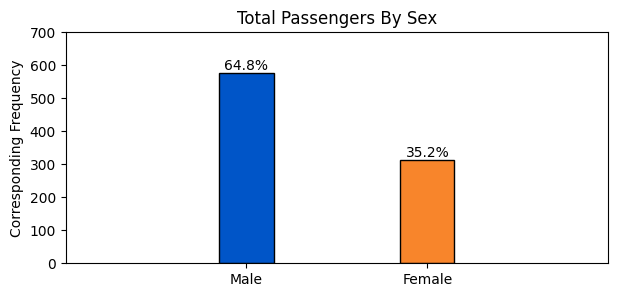

In [ ]:
# Histogram

sex = ("Male", "Female")

data_size = [577, 314]

fig, ax = plt.subplots(figsize =(7, 3))

bar_container = ax.bar(sex, data_size, color=['#0055C8', '#F8852B'], 
                       width = 0.30, edgecolor=['black'], align='center')

ax.set(ylabel='Corresponding Frequency', 
       title='Total Passengers By Sex', 
       ylim=(0, 700), 
       xlim=(-1, 2))

ax.bar_label(
    bar_container, fmt=lambda x: '{:.1f}%'.format((x / 891) * 100))



*65% of passengers was sex Male and 35% was Female.*

<br>

## Sex and Class

### Sex and Class 1

In [ ]:
sex_class_1 = data.loc[(data['Pclass'] == 1)]
sex_class_1.head(3)

,Survived,Pclass,Sex,Age
1,1,1,female,38.0
3,1,1,female,35.0
6,0,1,male,54.0


In [ ]:
sex_class_1['Sex'].value_counts()

Sex
male      122
female     94
Name: count, dtype: int64

### Sex and Class 2

In [ ]:
sex_class_2 = data.loc[(data['Pclass'] == 2)]
sex_class_2.head(3)

,Survived,Pclass,Sex,Age
9,1,2,female,14.0
15,1,2,female,55.0
17,1,2,male,24.0


In [ ]:
sex_class_2['Sex'].value_counts()

Sex
male      108
female     76
Name: count, dtype: int64

### Sex And Class 3

In [ ]:
sex_class_3 = data.loc[(data['Pclass'] == 3)]
sex_class_3.head(3)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
2,1,3,female,26.0
4,0,3,male,35.0


In [ ]:
sex_class_3['Sex'].value_counts()

Sex
male      347
female    144
Name: count, dtype: int64

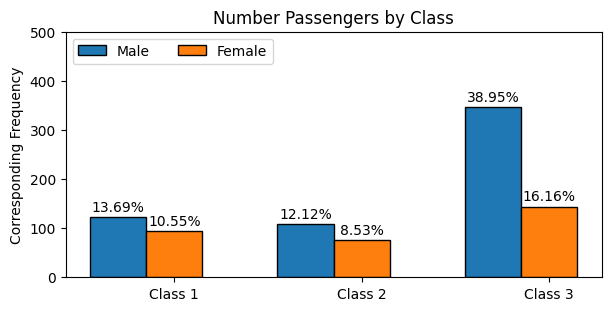

In [ ]:
species = ("Class 1", "Class 2", "Class 3")

penguin_means = {
    
    'Male': (122, 108, 347),
    'Female': (94, 76, 144),
}

x = np.arange(len(species))  
width = 0.30  
multiplier = 0


fig, ax = plt.subplots(layout='constrained', figsize =(6, 3))

for attribute, measurement in penguin_means.items():
    
    offset = width * multiplier
    
    rects = ax.bar(x + offset, measurement, width, 
                   label=attribute,
                   edgecolor=['black'])
    ax.bar_label(rects, padding=2, fmt=lambda x: '{:.2f}%'.format((x / 891) * 100))
    
    multiplier += 1


ax.set_ylabel('Corresponding Frequency')
ax.set_title('Number Passengers by Class')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=2)

ax.set_ylim(0, 500)
plt.show()

In the class 3 we have the greatest number of passengers (55%).

<br>

# Sex and Survived: Yes/No

### Sex | Survived: Yes

In [ ]:
surv_yes = data.loc[(data['Survived']== 1)]
surv_yes.head(3)

,Survived,Pclass,Sex,Age
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0


In [ ]:
surv_yes['Sex'].value_counts()

Sex
female    233
male      109
Name: count, dtype: int64

### Sex | Survived: No

In [ ]:
surv_no = data.loc[(data['Survived']== 0)]
surv_no.head(3)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
4,0,3,male,35.0
5,0,3,male,24.0


In [ ]:
surv_no['Sex'].value_counts()

Sex
male      468
female     81
Name: count, dtype: int64

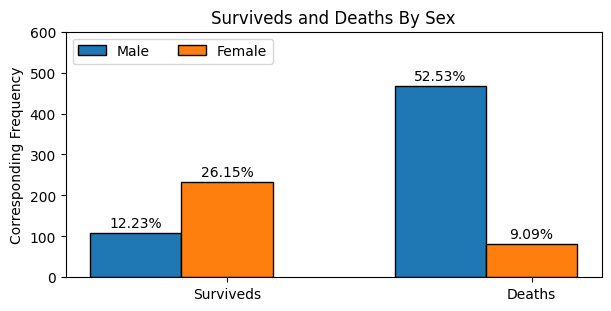

In [ ]:
species = ("Surviveds", "Deaths")

penguin_means = {
    
    'Male': (109, 468),
    'Female': (233, 81),
}


x = np.arange(len(species))
width = 0.30 
multiplier = 0


fig, ax = plt.subplots(layout='constrained', figsize =(6, 3))

for attribute, measurement in penguin_means.items():
    
    offset = width * multiplier
    
    rects = ax.bar(x + offset, measurement, width, 
                   label=attribute,
                   edgecolor=['black'])
    
    ax.bar_label(rects, padding=2, fmt=lambda x: '{:.2f}%'.format((x / 891) * 100))    
    multiplier += 1

    
ax.set_ylabel('Corresponding Frequency')
ax.set_title('Surviveds and Deaths By Sex')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=2)


ax.set_ylim(0, 600)
plt.show()

Regarding the total percentage of deaths (about 62%) considering the total number of passengers, approximately 53% were males.

<br>

# Sex and Class by Surviveds and No Surviveds

### Sex | Class 1  | Surviveds

In [ ]:
sex_class1_surv = data.loc[(data['Pclass']== 1) & (data['Survived']== 1)]
sex_class1_surv.head(3)

,Survived,Pclass,Sex,Age
1,1,1,female,38.0
3,1,1,female,35.0
11,1,1,female,58.0


In [ ]:
sex_class1_surv['Sex'].value_counts()

Sex
female    91
male      45
Name: count, dtype: int64

### Sex | Class 2  | Surviveds

In [ ]:
sex_class2_surv = data.loc[(data['Pclass']== 2) & (data['Survived']== 1)]
sex_class2_surv.head(3)

,Survived,Pclass,Sex,Age
9,1,2,female,14.0
15,1,2,female,55.0
17,1,2,male,24.0


In [ ]:
sex_class2_surv['Sex'].value_counts()

Sex
female    70
male      17
Name: count, dtype: int64

### Sex | Class 3  | Surviveds

In [ ]:
sex_class3_surv = data.loc[(data['Pclass']== 3) & (data['Survived']== 1)]
sex_class3_surv.head(3)

,Survived,Pclass,Sex,Age
2,1,3,female,26.0
8,1,3,female,27.0
10,1,3,female,4.0


In [ ]:
sex_class3_surv['Sex'].value_counts()

Sex
female    72
male      47
Name: count, dtype: int64

<br>

### Sex | Class 1 | Deaths

In [ ]:
sex_class1_deaths = data.loc[(data['Pclass']== 1) & (data['Survived']== 0)]
sex_class1_deaths.head(3)

,Survived,Pclass,Sex,Age
6,0,1,male,54.0
27,0,1,male,19.0
30,0,1,male,40.0


In [ ]:
sex_class1_deaths['Sex'].value_counts()

Sex
male      77
female     3
Name: count, dtype: int64

### Sex | Class 2 | Deaths

In [ ]:
sex_class2_deaths = data.loc[(data['Pclass']== 2) & (data['Survived']== 0)]
sex_class2_deaths.head(3)

,Survived,Pclass,Sex,Age
20,0,2,male,35.0
33,0,2,male,66.0
41,0,2,female,27.0


In [ ]:
sex_class2_deaths['Sex'].value_counts()

Sex
male      91
female     6
Name: count, dtype: int64

### Sex | Class 3 | Deaths

In [ ]:
sex_class3_deaths = data.loc[(data['Pclass']== 3) & (data['Survived']== 0)]
sex_class3_deaths.head(3)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
4,0,3,male,35.0
5,0,3,male,24.0


In [ ]:
sex_class3_deaths['Sex'].value_counts()

Sex
male      300
female     72
Name: count, dtype: int64

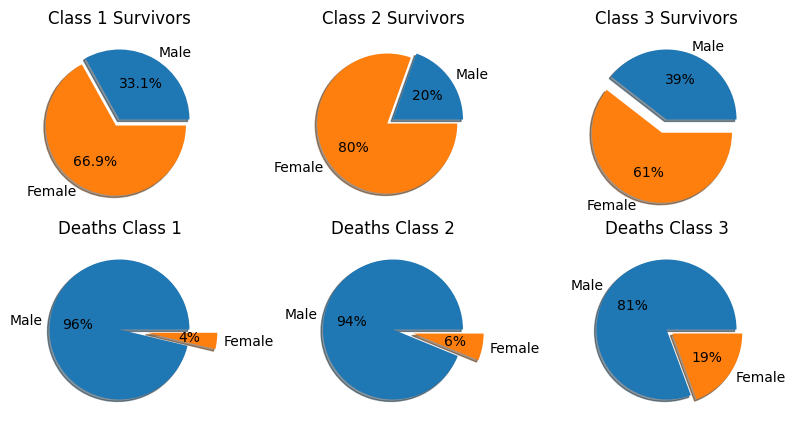

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(10, 5))

labels = ['Male', 'Female']


#### //// Survivors //////

# Surviveds class 1

# Some data
fracs = [45, 91]

axs[0, 0].pie(fracs, autopct='%1.1f%%', shadow=True, explode=(0, 0.1), labels=labels)
axs[0, 0].set_title('Class 1 Survivors')

#axs[0, 0].legend(ncols=1, labels=labels,
 #         title="Sex",
  #        loc="center",
   #       bbox_to_anchor=(1, 0, 0.5, 1))


# Surviveds class 2

# Some data
fracs = [17, 70]

axs[0, 1].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True,
              explode=(0, 0.1))
axs[0, 1].set_title('Class 2 Survivors')


# Surviveds class 3

# Some data
fracs = [47, 72]

axs[0, 2].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True,
              explode=(0, 0.2))
axs[0, 2].set_title('Class 3 Survivors')



#### //// Deaths //////

# Deaths class 1

# Some data
fracs = [77, 3]

axs[1, 0].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True,
              explode=(0, 0.4))
axs[1, 0].set_title('Deaths Class 1')


# Deaths class 2

# Some data
fracs = [91, 6]

axs[1, 1].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True, 
              explode=(0, 0.3))
axs[1, 1].set_title('Deaths Class 2')


# Deaths class 3

# Some data
fracs = [300, 72]

axs[1, 2].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True,
              explode=(0, 0.1))
axs[1, 2].set_title('Deaths Class 3')



plt.show()

*Regarding the total number of deaths in each class, the records computed for males are greater than or equal to 81%.*

<br>

# Class By Survivors and Deaths

### Class 1 | Survivors

In [130]:
class1_surv = data.loc[(data['Pclass']== 1) & (data['Survived']== 1)]
class1_surv.head(3)

,Survived,Pclass,Sex,Age
1,1,1,female,38.0
3,1,1,female,35.0
11,1,1,female,58.0


In [132]:
class1_surv['Pclass'].value_counts()

Pclass
1    136
Name: count, dtype: int64

### Class 2 | Survivors

In [133]:
class2_surv = data.loc[(data['Pclass']== 2) & (data['Survived']== 1)]
class2_surv.head(3)

,Survived,Pclass,Sex,Age
9,1,2,female,14.0
15,1,2,female,55.0
17,1,2,male,24.0


In [135]:
class2_surv['Pclass'].value_counts()

Pclass
2    87
Name: count, dtype: int64

### Class 3 | Survivors

In [136]:
class3_surv = data.loc[(data['Pclass']== 3) & (data['Survived']== 1)]
class3_surv.head(3)

,Survived,Pclass,Sex,Age
2,1,3,female,26.0
8,1,3,female,27.0
10,1,3,female,4.0


In [137]:
class3_surv['Pclass'].value_counts()

Pclass
3    119
Name: count, dtype: int64

<br>

### Class 1 | Deaths

In [139]:
class1_deaths = data.loc[(data['Pclass']== 1) & (data['Survived']== 0)]
class1_deaths.head(3)

,Survived,Pclass,Sex,Age
6,0,1,male,54.0
27,0,1,male,19.0
30,0,1,male,40.0


In [140]:
class1_deaths['Pclass'].value_counts()

Pclass
1    80
Name: count, dtype: int64

### Class 2 | Deaths

In [141]:
class2_deaths = data.loc[(data['Pclass']== 2) & (data['Survived']== 0)]
class2_deaths.head(3)

,Survived,Pclass,Sex,Age
20,0,2,male,35.0
33,0,2,male,66.0
41,0,2,female,27.0


In [142]:
class2_deaths['Pclass'].value_counts()

Pclass
2    97
Name: count, dtype: int64

### Class 3 | Deaths

In [143]:
class3_deaths = data.loc[(data['Pclass']== 3) & (data['Survived']== 0)]
class3_deaths.head(3)

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
4,0,3,male,35.0
5,0,3,male,24.0


In [144]:
class3_deaths['Pclass'].value_counts()

Pclass
3    372
Name: count, dtype: int64

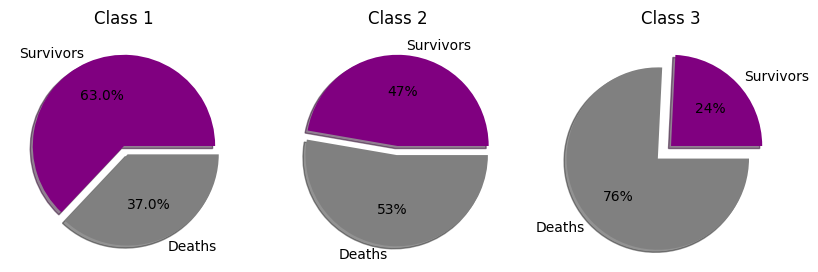

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

labels = ['Survivors', 'Deaths']
colors=['purple', 'gray']


# class 1

# Some data
fracs = [136, 80]

axs[0].pie(fracs, autopct='%1.1f%%', shadow=True, 
              explode=(0, 0.1), labels=labels, colors=colors)
axs[0].set_title('Class 1')

        
# class 2

# Some data
fracs = [87, 97]

axs[1].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True, colors=colors,
              explode=(0, 0.1))
axs[1].set_title('Class 2')



# class 3

# Some data
fracs = [119, 372]

axs[2].pie(fracs, labels=labels, autopct='%.0f%%', shadow=True, colors=colors,
              explode=(0, 0.2))
axs[2].set_title('Class 3')


plt.show()

*Class 3 has the highest number of deaths.*